Files already downloaded and verified


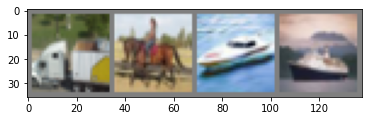

truck horse  ship  ship


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from app.datasets import SampleDataset
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.utils import make_grid


transform = Compose([
    ToTensor(),
    Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
    
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataset = SampleDataset("./data", train=True, transform=transform)

train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(make_grid(images))
# print labels
print(' '.join('%5s' % dataset.classes[labels[j]] for j in range(4)))

In [2]:
import torch

In [3]:
test_dataset = SampleDataset("./data", train=False, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

model = torch.load("model.pt")
model.eval()

correct_test = 0.0

with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        outputs = torch.argmax(outputs, dim=1)

        #print(outputs.eq(targets).sum().item())
        correct_test += outputs.eq(targets).sum().item()

print("Accuracy = ", correct_test / len(test_dataset))

Files already downloaded and verified
Accuracy =  0.5324
